In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset_path = '../../datasets/student_performance.csv'

In [9]:
df = pd.read_csv(dataset_path, delimiter=',')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
def two_str_value_to_int(df:pd.DataFrame, columns:list):
    for column in columns:
        # unique_values = list(df[column].unique())
        if 'yes' in list(df[column].unique()):
            unique_values = ['no', 'yes']
        # if len(unique_values) == 2:
            df[column] = df[column].apply(lambda x: unique_values.index(str(x).lower()))
    return df


In [10]:
str_columns = [
    "school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", 
    "reason", "guardian", "schoolsup", "famsup", "paid", "activities", 
    "nursery", "higher", "internet", "romantic"
]

df = two_str_value_to_int(df, str_columns)
df[str_columns].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,1,0,0,0,1,1,0,0
1,GP,F,U,GT3,T,at_home,other,course,father,0,1,0,0,0,1,1,0
2,GP,F,U,LE3,T,at_home,other,other,mother,1,0,0,0,1,1,1,0
3,GP,F,U,GT3,T,health,services,home,mother,0,1,0,1,1,1,1,1
4,GP,F,U,GT3,T,other,other,home,father,0,1,0,0,1,1,0,0


In [ ]:
for column in str_columns:
    print(f'column = {column} || unique values = {list(df[column].unique())}')


column = school || unique values = ['GP', 'MS']
column = sex || unique values = ['F', 'M']
column = address || unique values = ['U', 'R']
column = famsize || unique values = ['GT3', 'LE3']
column = Pstatus || unique values = ['A', 'T']
column = Mjob || unique values = ['at_home', 'health', 'other', 'services', 'teacher']
column = Fjob || unique values = ['teacher', 'other', 'services', 'health', 'at_home']
column = reason || unique values = ['course', 'other', 'home', 'reputation']
column = guardian || unique values = ['mother', 'father', 'other']
column = schoolsup || unique values = [np.int64(1), np.int64(0)]
column = famsup || unique values = [np.int64(0), np.int64(1)]
column = paid || unique values = [np.int64(0), np.int64(1)]
column = activities || unique values = [np.int64(0), np.int64(1)]
column = nursery || unique values = [np.int64(1), np.int64(0)]
column = higher || unique values = [np.int64(1), np.int64(0)]
column = internet || unique values = [np.int64(0), np.int64(1)]
colu

In [14]:
df = pd.get_dummies(df)

In [15]:
before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f'Count before drop duplicates: {before}')
print(f'Count after drop duplicates: {after}')

Count before drop duplicates: 649
Count after drop duplicates: 649


| Nota (0 a 10) | Nota GPA (Escala de 4.0) | Nota Letra |
|---------------------|--------------------------|------------|
| 9.0 a 10.0          | 4.0                      | A          |
| 8.0 a 8.9           | 3.0 - 3.9                | B          |
| 7.0 a 7.9           | 2.0 - 2.9                | C          |
| 6.0 a 6.9           | 1.0 - 1.9                | D          |
| 0 a 5.9             | 0.0                      | F          |


In [16]:
df['G2'].unique()

array([11, 13, 14, 12, 16, 17,  8, 10, 15,  9,  7,  6, 18, 19,  0,  5])

In [17]:
df['GPA_result'] = df['G2'].apply(lambda x: 'PASS' if int(x)/5 >= 2 else 'FAIL')

In [ ]:
# df = df.drop(columns=['G1', 'G2', 'G3'])

In [19]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,0.104777,0.613251,0.060092,0.485362,...,0.893683,0.767334,0.368259,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.306502,0.487381,0.237841,0.500171,...,0.308481,0.422857,0.482704,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000


In [20]:
df.dtypes

age                   int64
Medu                  int64
Fedu                  int64
traveltime            int64
studytime             int64
failures              int64
schoolsup             int64
famsup                int64
paid                  int64
activities            int64
nursery               int64
higher                int64
internet              int64
romantic              int64
famrel                int64
freetime              int64
goout                 int64
Dalc                  int64
Walc                  int64
health                int64
absences              int64
school_GP              bool
school_MS              bool
sex_F                  bool
sex_M                  bool
address_R              bool
address_U              bool
famsize_GT3            bool
famsize_LE3            bool
Pstatus_A              bool
Pstatus_T              bool
Mjob_at_home           bool
Mjob_health            bool
Mjob_other             bool
Mjob_services          bool
Mjob_teacher        

In [21]:
columns_to_X = [
    'age',
    'sex_F',
    'sex_M',
    'paid',
    'health',
    'goout',
    'studytime',
    'freetime',
    'activities',
    'internet',
    'romantic',
    'famrel',
    'absences',
    'guardian_father',
    'guardian_mother',
    'guardian_other'
]

In [22]:
X = df[columns_to_X]
y = df['GPA_result'].map({'PASS':1, 'FAIL':0})
# y = y.map({'PASS':1, 'FAIL':0})

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Instancia um classificador tipo rede neural com, no máximo, 2000 épocas
model = MLPClassifier(random_state=1, max_iter=2000)

model.fit(X_train, y_train)

MLPClassifier(max_iter=10000, random_state=1)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

Matriz de Confusão
Acurácia: 0.70
Precisão (M): 0.79
Precisão média ponderada: 0.68
Recall (M): 0.83
Recall médio ponderado: 0.70
F1 (M): 0.81
F1 médio ponderado: 0.69


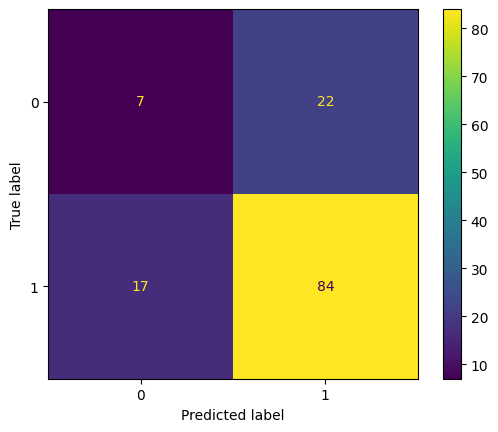

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(X_test)

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test.unique())
disp.plot()

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Precisão para Maligno
pre = precision_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("Precisão (M): {:.2f}".format(pre))

# Precisão média ponderada
prem = precision_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("Precisão média ponderada: {:.2f}".format(prem))

# Recall para Maligno
rec = recall_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("Recall (M): {:.2f}".format(rec))

# Recall médio ponderado
recm = recall_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("Recall médio ponderado: {:.2f}".format(recm))

# F1 para Maligno
f1 = f1_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("F1 (M): {:.2f}".format(f1))

# F1 médio ponderado
f1m = f1_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("F1 médio ponderado: {:.2f}".format(f1m))



In [ ]:
# import joblib

In [ ]:
# joblib.dump(model, 'house_price_linear_regression_model.pkl')
